In [1]:
"""
creamos una funcion que muestra un scatter plot pero con transaparencias, esto es util cuando tenemos muchos puntos superpuestos 
y no podemos ver donde se concenra la densidad de esos puntos.
"""

'\ncreamos una funcion que muestra un scatter plot pero con transaparencias, esto es util cuando tenemos muchos puntos superpuestos \ny no podemos ver donde se concenra la densidad de esos puntos.\n'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

In [35]:
url = 'Automobile price data _Raw_.csv'
data = pd.read_csv(url)
data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [38]:
#Creamos una funcion que limpie los guiones altos y los cambie por bajos en la cabecera.

def limpia_guiones(data):
    columnas = data.columns
    data.columns = [str.replace('-','_') for str in columnas]

In [39]:
data.aux = data
limpia_guiones(data)

In [40]:
data.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

In [41]:
##creamos una funcion para convertir de objeto a numerico. 
def pasa_a_numerico(data):
    import numpy as np
    import pandas as pd
    columnas = ['price', 'bore', 'stroke', 'horsepower', 'peak_rpm']
    for col in columnas:
        data.loc[data[col]=='?',col]=np.nan
        data[col].dropna(axis=0,inplace=True)
    
    for col in columnas:
        data[col] = pd.to_numeric(data[col])
    
    return data
        

In [42]:
pasa_a_numerico(data)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,13495.0
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,16500.0
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154.0,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102.0,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115.0,5500.0,18,22,17450.0
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,15250.0
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,17710.0
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,18920.0
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140.0,5500.0,17,20,23875.0
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160.0,5500.0,16,22,NaN


In [43]:
data.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

In [46]:
##creamos una funcion que muestre un scatter plot con atenuacion de puntos.

def crea_scatter_plot_t(data,x_col, y_col = 'price', alpha = 0.2):
    for col in x_col:
        fig = plt.figure(figsize=(7,6))
        ax = fig.gca()
        data.plot.scatter(col,y_col,alpha=alpha,ax=ax)
        ax.set_title('Columna ' + y_col + ' vs columna ' + col)
        ax.set_xlabel(col)
        ax.set_ylabel(y_col)
        plt.show()

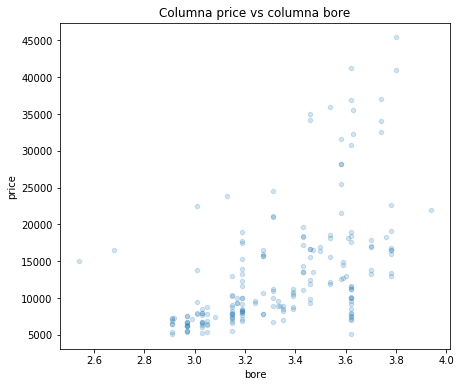

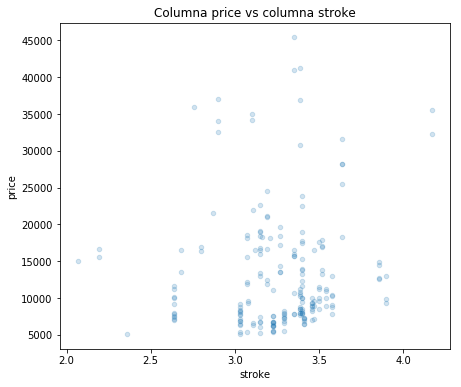

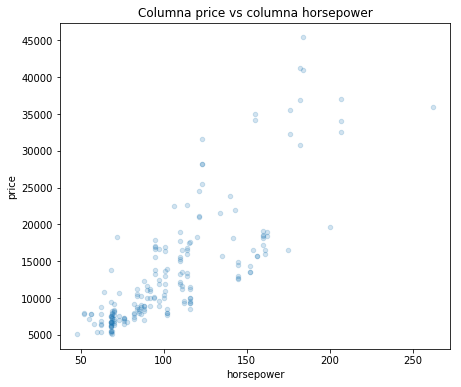

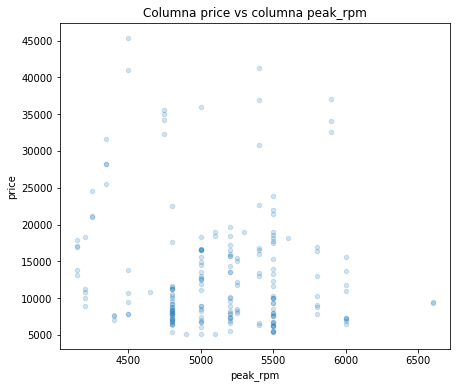

In [47]:
columnas = [ 'bore', 'stroke', 'horsepower', 'peak_rpm']
crea_scatter_plot_t(data,columnas)